In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)
dataset.columns = attributes

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
data = pd.read_csv('data.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# number of instances in each class
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
X = dataset.drop('class', axis=1)
y = dataset['class']

In [12]:
# Take out a test set
train_features, test_features, train_target, test_target = train_test_split(X, y, test_size = 0.2, stratify = dataset['class'], random_state = 42)

In [14]:
# number of instances in each class in training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(train_features, train_target)

LogisticRegression()

In [17]:
model.score(test_features, test_target)

0.9666666666666667

In [18]:
test_features.head()

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
127,6.1,3.0,4.9,1.8
57,4.9,2.4,3.3,1.0
93,5.0,2.3,3.3,1.0
42,4.4,3.2,1.3,0.2


In [19]:
model.predict([[3.5, 4.4, 1.5, 0.5]])

array(['Iris-setosa'], dtype=object)

In [22]:
y_predicted = model.predict(test_features)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_target, y_predicted)
cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

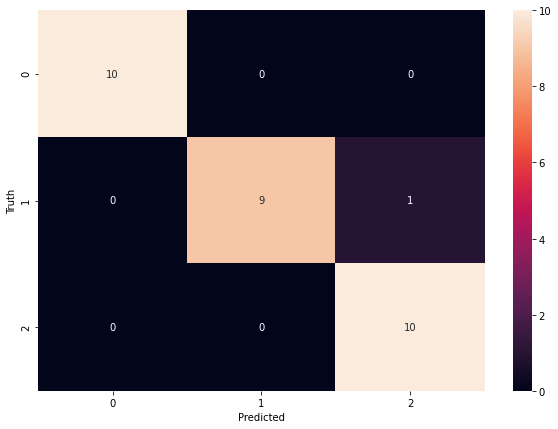

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Compare the output with Samples
output = pd.DataFrame(test_target[0:10])
output['predicted'] = y_predicted[0:10]
#output['difference'] = output['predicted'] - output['class']
print(output,"\n")

               class        predicted
38       Iris-setosa      Iris-setosa
127   Iris-virginica   Iris-virginica
57   Iris-versicolor  Iris-versicolor
93   Iris-versicolor  Iris-versicolor
42       Iris-setosa      Iris-setosa
56   Iris-versicolor  Iris-versicolor
22       Iris-setosa      Iris-setosa
20       Iris-setosa      Iris-setosa
147   Iris-virginica   Iris-virginica
84   Iris-versicolor  Iris-versicolor 



In [26]:
# Visualization

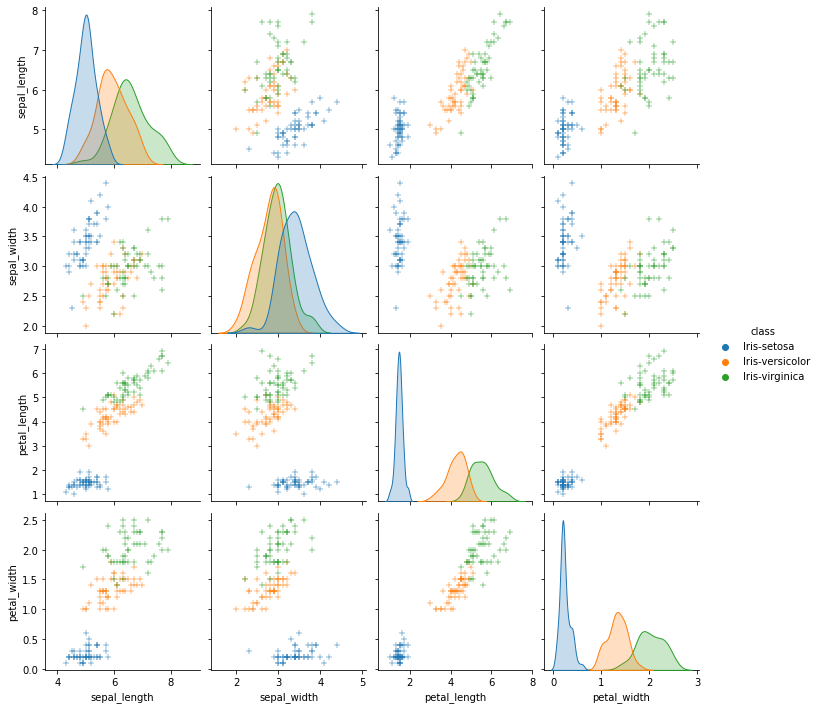

In [31]:
#tmp = dataset.drop('Id', axis=1)
g = sns.pairplot(dataset, hue='class', markers='+')
plt.show()